# **Libraries**

In [156]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Machine Learning/Assignment 2

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Machine Learning/Assignment 2


In [152]:
import math, copy
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [160]:
!cp /content/drive/MyDrive/Machine\ Learning/Assignment\ 2/utils.py /content

In [173]:
from utils import *

# **PART 1**

In [176]:
class dataset:
  num_pts = None
  df = pd.DataFrame(columns = ['x', 'y', 'label'])
  def __init__(self, points):
        self.num_pts = points
        self.generate_data()

  def generate_data(self):
    # df = pd.DataFrame(columns = ['x', 'y', 'label'])
    for i in range(self.num_pts):
      choice = random.randint(0,1)
      if(choice == 1):
        label = 0
        h = 0 
        k = 0 
        r = 1
        theta = random.uniform(0.0,360.0)
        x = math.sin(math.radians(theta))
        y = math.cos(math.radians(theta))
        self.df = self.df.append({'x' : x, 'y' : y, 'label' : label} , ignore_index = True)
      else:
        label = 1
        h = 0 
        k = 3 
        r = 1
        theta = random.uniform(0.0,360.0)
        x = math.sin(math.radians(theta))
        y = k + math.cos(math.radians(theta))
        self.df = self.df.append({'x' : x, 'y' : y, 'label' : label} , ignore_index = True)
  
  def get(self , add_noise = False):
    if add_noise == False:
      return self.df 
    else:
      noise1 = np.random.normal(0,0.1,self.num_pts)
      noise2 = np.random.normal(0,0.1,self.num_pts)
      df2 = pd.DataFrame(columns = ['x', 'y', 'label'])
      df2['x'] = self.df['x'] + noise1
      df2['y'] = self.df['y'] + noise2
      df2['label'] = self.df['label']
    return df2

In [4]:
data = dataset(10000)
normal_df = data.get(False)
noisy_df = data.get(True)
print(noisy_df.head)
print(normal_df.head)

<bound method NDFrame.head of              x         y  label
0    -0.840085  0.294885    0.0
1    -0.874344  0.623158    0.0
2     0.274060  0.986477    0.0
3     0.406127 -0.871180    0.0
4    -1.049733  3.385794    1.0
...        ...       ...    ...
9995  0.088113 -1.114965    0.0
9996  0.087507 -0.756373    0.0
9997 -0.019767 -0.965265    0.0
9998  0.526931 -0.700394    0.0
9999 -0.755242  3.606566    1.0

[10000 rows x 3 columns]>
<bound method NDFrame.head of              x         y  label
0    -0.932732  0.360571    0.0
1    -0.799262  0.600983    0.0
2     0.327484  0.944857    0.0
3     0.613882 -0.789398    0.0
4    -0.968415  3.249343    1.0
...        ...       ...    ...
9995  0.023713 -0.999719    0.0
9996 -0.020161 -0.999797    0.0
9997 -0.124960 -0.992162    0.0
9998  0.607776 -0.794109    0.0
9999 -0.735639  3.677374    1.0

[10000 rows x 3 columns]>


# **PART 2**

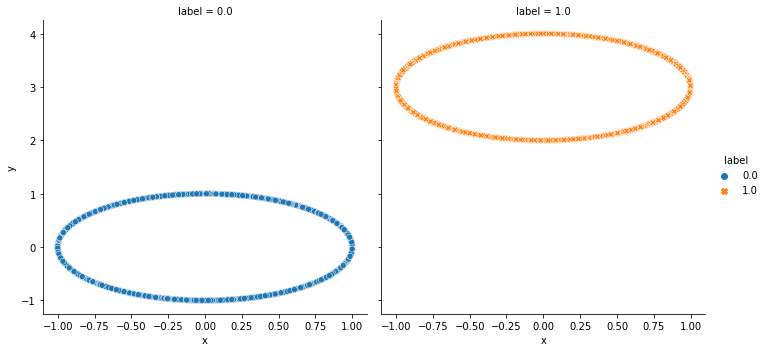

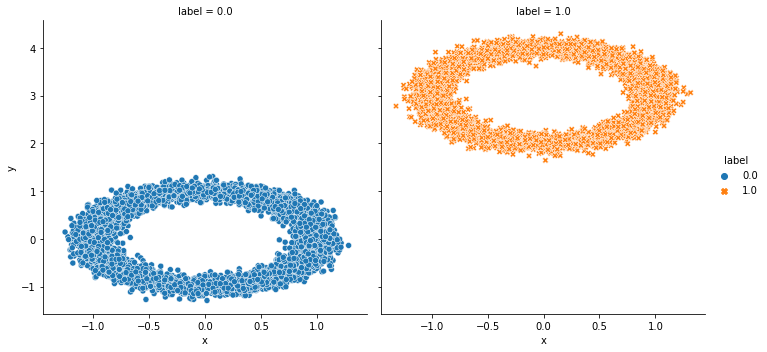

In [5]:
sns.relplot(
    data=normal_df, x="x", y="y",
    col="label", hue="label", style="label",
    kind="scatter"
)
sns.relplot(
    data=noisy_df, x="x", y="y",
    col="label", hue="label", style="label",
    kind="scatter"
)

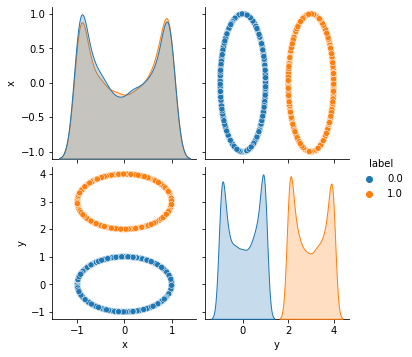

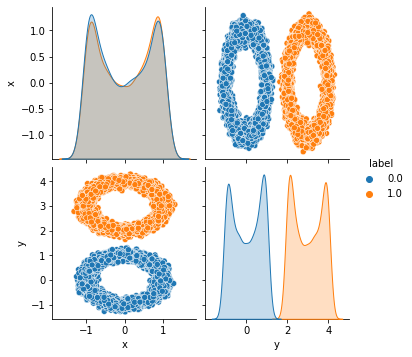

In [6]:
sns.pairplot(normal_df , hue = 'label')
sns.pairplot(noisy_df , hue = 'label')

# **Data Assignment**

In [7]:
XX = normal_df.iloc[:,0:2]
XX = XX.to_numpy()
YY = normal_df.iloc[:,2:]
YY = YY.to_numpy()
# print(XX,YY)
# print(XX.shape)

In [8]:
XXN = noisy_df.iloc[:,0:2]
XXN = XXN.to_numpy()
YYN = normal_df.iloc[:,2:]
YYN = YYN.to_numpy()
# print(XXN,YYN)
# print(XXN.shape)

In [73]:
# make perceptron prediction class
class Perceptron:
    weights = None
    bias = None
    iterations  = None
    def __init__(self, iterations=100):
        self.iterations = iterations

    def sgn(self, y_hat):
        if(y_hat >= 0):
            return 1
        else:
            return 0

    def fit(self, X, y):
        self.weights = np.ones(X.shape[1])
        self.bias = 2
        converged = True
        i  = 0 
        while(converged != False):
          # print("------Itr : ", i , "------")
          oldw = self.weights
          oldb = self.bias
          for j in range(len(X)):
              y_hat = np.dot(X[j], self.weights) + self.bias
              error = y[j] - self.sgn(y_hat)
              # print("error" , error)
              if(error != 0):
                    self.weights = self.weights + error * X[j]
                    self.bias = self.bias + error                            
          if(np.array_equal(oldw,self.weights) and oldb == self.bias):
            converged = False
          else:
            oldw = self.weights
            oldb = self.bias
          i=i+1
          if(i == 500):
            break
        return self.weights , self.bias
    
    def predict(self, X):
      # print(X.shape , self.weights.shape , np.dot(X , self.weights).shape)
      ans = (np.dot(X , self.weights) + self.bias)
      for i in range(X.shape[0]):
        if( ans[i] >= 0):
          ans[i] = 1
        else:
          ans[i] = 0
      return ans
    
    def accuracy(self, y_predicted, y_test):
        count = 0
        m = y_test.shape[0]
        for i in range(m):
          if(y_test[i] == y_predicted[i]):     
            count = count + 1;
        ans = count / m
        return ans


In [76]:
# make perceptron prediction class
class Zero_Bias_Perceptron:
    weights = None
    iterations  = None
    def __init__(self, iterations=100):
        self.iterations = iterations

    def sgn(self, y_hat):
        if(y_hat >= 0):
            return 1
        else:
            return 0

    def fit(self, X, y):
        self.weights = np.ones(X.shape[1])
        converged = True
        i  = 0 
        while(converged != False):
          # print("------Itr : ", i , "------")
          oldw = self.weights
          for j in range(len(X)):
              y_hat = np.dot(X[j], self.weights)
              error = y[j] - self.sgn(y_hat)
              # print("error" , error)
              if(error != 0):
                    self.weights = self.weights + error * X[j]                           
          if(np.array_equal(oldw,self.weights)):
            converged = False
          else:
            oldw = self.weights
          i=i+1
          if(i == 500):
            break
        return self.weights
    
    def predict(self, X):
      # print(X.shape , self.weights.shape , np.dot(X , self.weights).shape)
      ans = np.dot(X , self.weights)
      for i in range(X.shape[0]):
        if( ans[i] >= 0):
          ans[i] = 1
        else:
          ans[i] = 0
      return ans
    
    def accuracy(self, y_predicted, y_test):
        count = 0
        m = y_test.shape[0]
        for i in range(m):
          if(y_test[i] == y_predicted[i]):     
            count = count + 1;
        ans = count / m
        return ans

In [84]:
def plot_decision_boundary(X, Y, w , b):
  fig = plt.figure(figsize=(10,10))
  plt.plot(X[:,0], X[: ,1] , "r^")
  plt.xlabel("X")
  plt.ylabel("Y")
  plt.title('Perceptron Algorithm')

  if(w[1] != 0):
    m = -w[0]/w[1]
    c = -b/w[1]
    print("m:",m, "c:", c)
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = c + m * x_vals
    plt.plot(x_vals, y_vals, '--')
    # plt.plot(x1, x2, linewidth=2)
  else:
    print("Decision boundary not possible")

In [92]:
def plot_decision_boundary2(X, Y, w , b):

  sns.relplot(x=X[0][:], y=X[1][:], hue = Y, kind="scatter")
  plt.xlabel("X")
  plt.ylabel("Y")
  plt.title('Perceptron Algorithm')

  if(w[1] != 0):
    x1 = [min(X[0,:]), max(X[0,:])]
    m = -w[0]/w[1]
    c = -b/w[1]
    print("m:",m, "c:", c)
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = c + m * x_vals
    plt.plot(x_vals, y_vals, '--')
  else:
    print("Decision boundary not possible")

# **PART 3**

**Training data with no noise**

Train Accuracy:  1.0
Test Accuracy:  1.0
w :  [-0.14836217  1.81352825] b:  [-2.]
m: [1.10282263] c: [1.10282263]


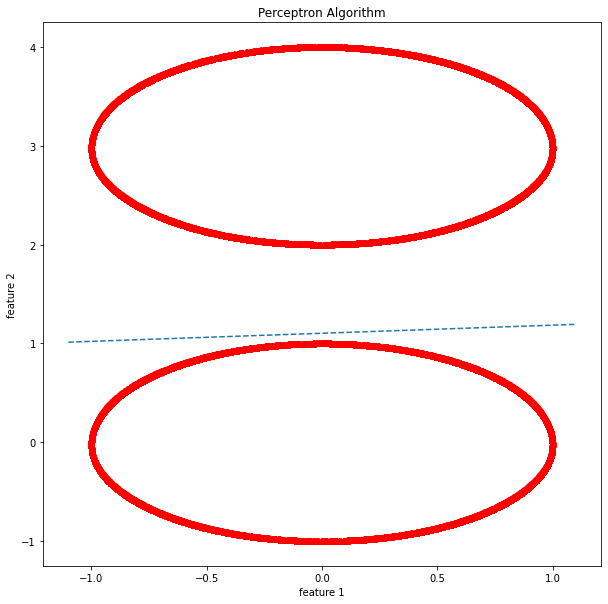

In [81]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(XX, YY, test_size=0.2, random_state=42, stratify=YY)
prcptrn1 = Perceptron(10)
w1 , b1 = prcptrn1.fit(X_train , y_train)
y_train_pred = prcptrn1.predict(X_train)
y_test_pred = prcptrn1.predict(X_test)
print("Train Accuracy: ", prcptrn1.accuracy(y_train_pred, y_train))
print("Test Accuracy: ", prcptrn1.accuracy(y_test_pred, y_test))
print("w : " , w1 , "b: " , b1)
plot_decision_boundary(XX, YY,  w1 , b1)

**Training data with noise**

Train Accuracy:  1.0
Test Accuracy:  1.0
m: [1.45850017] c: [1.45850017]


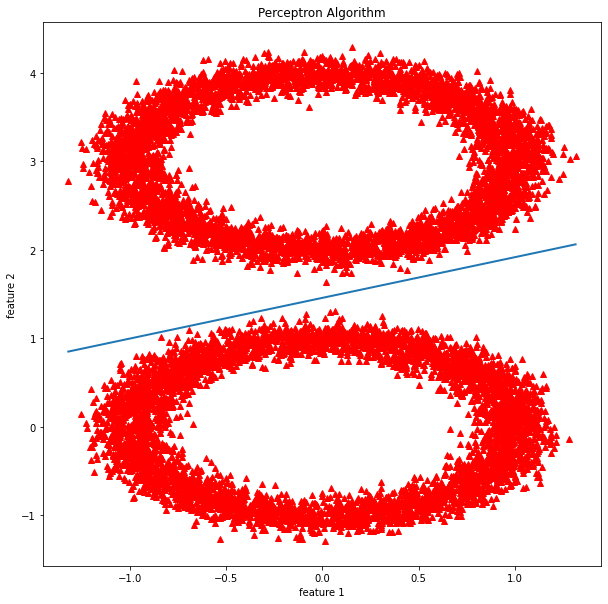

In [75]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train1, y_test1 = train_test_split(XXN, YYN, test_size=0.2, random_state=42, stratify=YYN)
prcptrn2 = Perceptron(1000)
w2 , b2 = prcptrn2.fit(X_train1 , y_train1)
y_train_pred2 = prcptrn2.predict(X_train1)
y_test_pred2 = prcptrn2.predict(X_test1)
print("Train Accuracy: ", prcptrn2.accuracy(y_train_pred2, y_train1))
print("Test Accuracy: ", prcptrn2.accuracy(y_test_pred2, y_test1))
plot_decision_boundary(XXN, YYN,  w2 , b2)

# **PART 4**

**Training data with no noise and bias = 0**

Train Accuracy:  0.738625
Test Accuracy:  0.752
w :  [-0.26011222  1.58240612]
m: 0.16437766281340124 c: 0.0


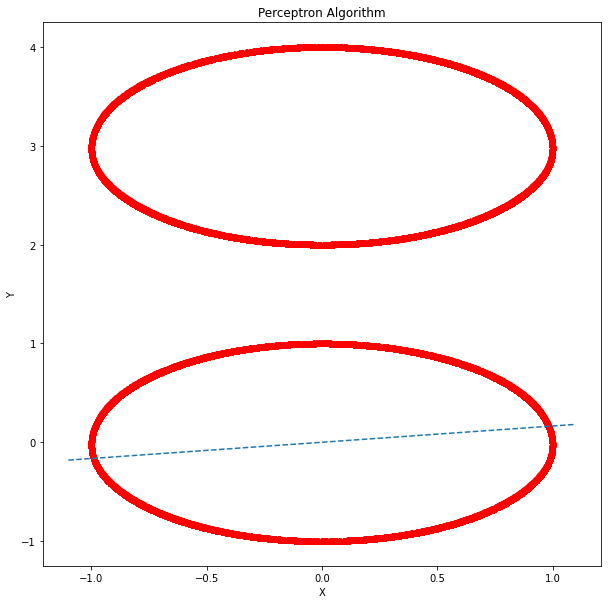

In [85]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(XX, YY, test_size=0.2, random_state=42, stratify=YY)
prcptrn1 = Zero_Bias_Perceptron(100)
w1 = prcptrn1.fit(X_train , y_train)
y_train_pred = prcptrn1.predict(X_train)
y_test_pred = prcptrn1.predict(X_test)
print("Train Accuracy: ", prcptrn1.accuracy(y_train_pred, y_train))
print("Test Accuracy: ", prcptrn1.accuracy(y_test_pred, y_test))
print("w : " , w1)
plot_decision_boundary(XX, YY,  w1 , 0)

**Training data with noise and bias = 0**

Train Accuracy:  0.73875
Test Accuracy:  0.7525
w :  [-0.3698479   1.76415824]
m: 0.20964553854510104 c: 0.0


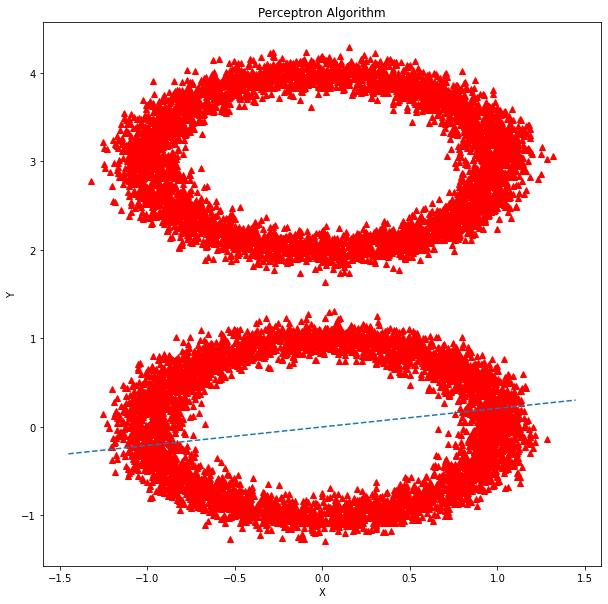

In [86]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train1, y_test1 = train_test_split(XXN, YYN, test_size=0.2, random_state=42, stratify=YYN)
prcptrn2 = Zero_Bias_Perceptron(1000)
w2 = prcptrn2.fit(X_train1 , y_train1)
y_train_pred2 = prcptrn2.predict(X_train1)
y_test_pred2 = prcptrn2.predict(X_test1)
print("Train Accuracy: ", prcptrn2.accuracy(y_train_pred2, y_train1))
print("Test Accuracy: ", prcptrn2.accuracy(y_test_pred2, y_test1))
print("w : " , w2)
plot_decision_boundary(XXN, YYN,  w2 , 0)

# **PART 5**

In [87]:
X = np.array([1,1,0,0])
Y = np.array([1,0,1,0])
input = np.array([[1,1,0,0],[1,0,1,0]])
and_data = X & Y
or_data = X | Y
xor_data_temp = np.logical_xor(X , Y)
xor_data = np.array([1,1,0,0])
for i in range(xor_data.shape[0]):
  if(xor_data_temp[i] == False):
    xor_data[i] = 0
  else:
    xor_data[i] = 1
print("X Y  XOR AND OR")
for i in range(xor_data.shape[0]):
  print(input[0][i] , input[1][i] ," ", xor_data[i] ," ", and_data[i] ," ", or_data[i])

X Y  XOR AND OR
1 1   0   1   1
1 0   1   0   1
0 1   1   0   1
0 0   0   0   0


In [88]:
df5 = pd.DataFrame(columns = ['x', 'y', 'and' , 'or' , 'xor'])
for i in range(4):
  df5 = df5.append({'x' : X[i], 'y' : Y[i], 'and' : and_data[i] , 'or': or_data[i] , 'xor' : xor_data[i] } , ignore_index = True)
df5

,x,y,and,or,xor
0,1,1,1,1,0
1,1,0,0,1,1
2,0,1,0,1,1
3,0,0,0,0,0


**AND**

W:  [1.0 2.0] B:  -3
Accuracy:  1.0
m: -0.5 c: 1.5


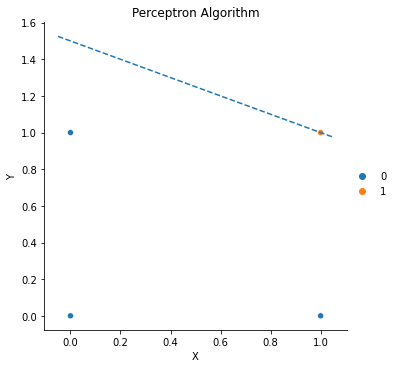

In [97]:
x_and = df5.iloc[:,0:2]
x_and = x_and.to_numpy()
y_and = df5['and']
y_and = y_and.to_numpy()
and_percep = Perceptron(1000)
w1 , b1 = and_percep.fit(x_and , y_and)
print("W: " , w1,"B: ",b1)
y_pred = and_percep.predict(x_and)
print("Accuracy: ", and_percep.accuracy(y_pred, y_and))
plot_decision_boundary2(np.transpose(x_and), y_and,  w1 , b1)

**OR**

W:  [1.0 1.0]  B:  -1
Accuracy:  1.0
m: -1.0 c: 1.0


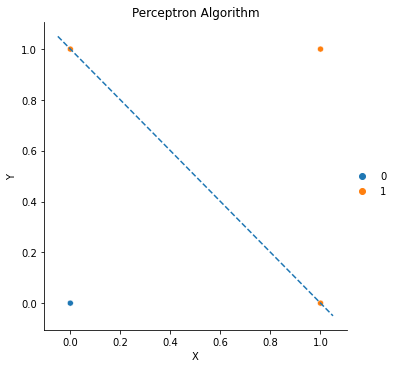

In [98]:
x_or = df5.iloc[:,0:2]
x_or = x_or.to_numpy()
y_or = df5['or']
y_or = y_or.to_numpy()
or_percep = Perceptron(100)
w2 , b2 = or_percep.fit(x_or , y_or)
print("W: " , w2," B: ",b2)
y_pred = or_percep.predict(x_or)
print("Accuracy: ", or_percep.accuracy(y_pred, y_or))
plot_decision_boundary2(np.transpose(x_or), y_or,  w2 , b2)

**XOR**

W:  [0.0 0.0]  B:  0
Accuracy:  0.5
Decision boundary not possible


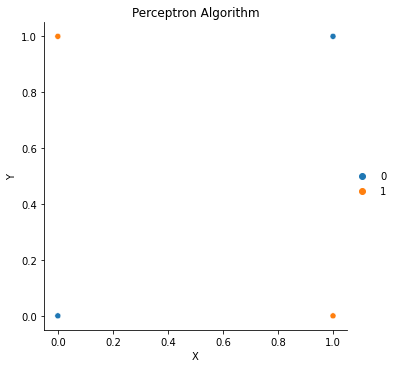

In [99]:
x_xor = df5.iloc[:,0:2]
x_xor = x_xor.to_numpy()
y_xor = df5['xor']
y_xor = y_xor.to_numpy()
xor_percep = Perceptron(100)
w3 , b3 = xor_percep.fit(x_xor , y_xor)
print("W: " , w3," B: ",b3)
y_pred = xor_percep.predict(x_xor)
print("Accuracy: ", xor_percep.accuracy(y_pred, y_xor))
plot_decision_boundary2(np.transpose(x_xor), y_xor,  w3 , b3)

**AND_BIAS**

W:  [-1.0 -1.0] B:  0
Accuracy:  0.5
m: -1.0 c: -0.0


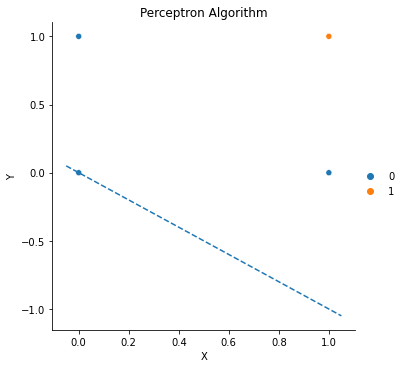

In [102]:
x_and = df5.iloc[:,0:2]
x_and = x_and.to_numpy()
y_and = df5['and']
y_and = y_and.to_numpy()
and_percep = Zero_Bias_Perceptron(1000)
w1  = and_percep.fit(x_and , y_and)
print("W: " , w1,"B: ",0)
y_pred = and_percep.predict(x_and)
print("Accuracy: ", and_percep.accuracy(y_pred, y_and))
plot_decision_boundary2(np.transpose(x_and), y_and,  w1 , 0)

**OR_BIAS**

W:  [1.0 1.0]  B:  0
Accuracy:  0.75
m: -1.0 c: 0.0


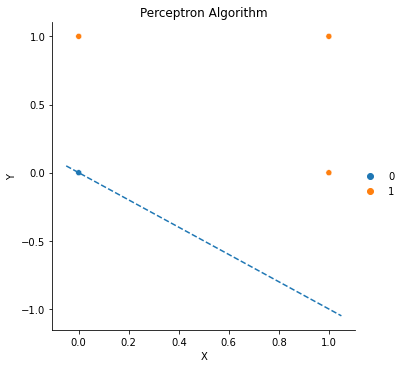

In [103]:
x_or = df5.iloc[:,0:2]
x_or = x_or.to_numpy()
y_or = df5['or']
y_or = y_or.to_numpy()
or_percep = Zero_Bias_Perceptron(100)
w2  = or_percep.fit(x_or , y_or)
print("W: " , w2," B: ", 0)
y_pred = or_percep.predict(x_or)
print("Accuracy: ", or_percep.accuracy(y_pred, y_or))
plot_decision_boundary2(np.transpose(x_or), y_or,  w2 , 0)

**XOR_BIAS**

W:  [0.0 0.0]  B:  0
Accuracy:  0.5
Decision boundary not possible


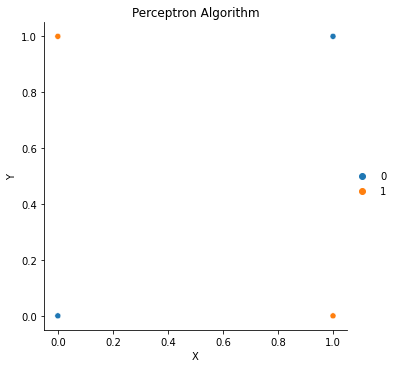

In [104]:
x_xor = df5.iloc[:,0:2]
x_xor = x_xor.to_numpy()
y_xor = df5['xor']
y_xor = y_xor.to_numpy()
xor_percep = Zero_Bias_Perceptron(100)
w3  = xor_percep.fit(x_xor , y_xor)
print("W: " , w3," B: ", 0)
y_pred = xor_percep.predict(x_xor)
print("Accuracy: ", xor_percep.accuracy(y_pred, y_xor))
plot_decision_boundary2(np.transpose(x_xor), y_xor,  w3 , 0)